# 1부터 100까지 소수 분포 분석

이 노트북에서는 1부터 100까지의 소수를 찾고, 다양한 형태의 막대 그래프로 분포를 시각화합니다.

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'  # 또는 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

print('라이브러리 로드 완료')

라이브러리 로드 완료


## 1. 소수 찾기 함수

In [43]:
def is_prime(n):
    """주어진 숫자가 소수인지 판별"""
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def find_primes(start, end):
    """범위 내의 모든 소수 찾기"""
    primes = []
    for num in range(start, end + 1):
        if is_prime(num):
            primes.append(num)
    return primes

# 1부터 100까지의 소수 찾기
primes = find_primes(1, 100)
print(f'1부터 100까지의 소수 개수: {len(primes)}개')
print(f'소수 목록: {primes}')

1부터 100까지의 소수 개수: 25개
소수 목록: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


## 2. 소수 분포 분석

In [44]:
# 10단위로 소수 개수 세기
ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50), 
          (51, 60), (61, 70), (71, 80), (81, 90), (91, 100)]

range_labels = [f'{start}-{end}' for start, end in ranges]
prime_counts = []

for start, end in ranges:
    count = sum(1 for p in primes if start <= p <= end)
    prime_counts.append(count)
    print(f'{start:3d}-{end:3d}: {count}개')

print(f'\n총 소수 개수: {sum(prime_counts)}개')

  1- 10: 4개
 11- 20: 4개
 21- 30: 2개
 31- 40: 2개
 41- 50: 3개
 51- 60: 2개
 61- 70: 2개
 71- 80: 3개
 81- 90: 2개
 91-100: 1개

총 소수 개수: 25개


## 3. 그래프 1: 기본 세로 막대 그래프

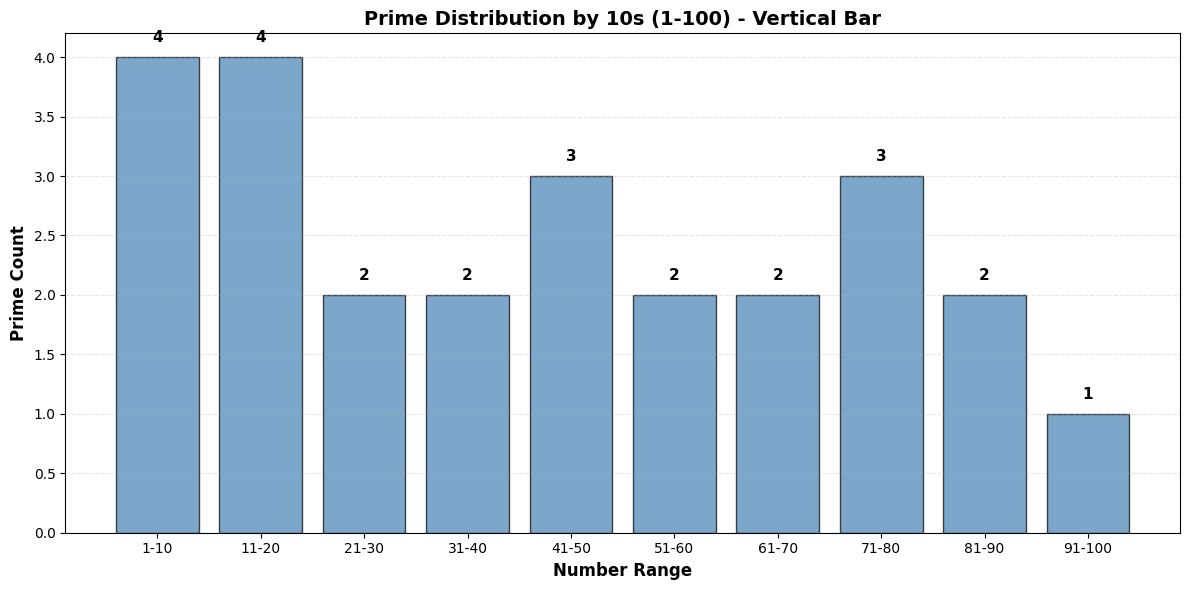

In [45]:
plt.figure(figsize=(12, 6))
bars = plt.bar(range_labels, prime_counts, color='steelblue', edgecolor='black', alpha=0.7)

# 막대 위에 값 표시
for i, (bar, count) in enumerate(zip(bars, prime_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Number Range', fontsize=12, fontweight='bold')
plt.ylabel('Prime Count', fontsize=12, fontweight='bold')
plt.title('Prime Distribution by 10s (1-100) - Vertical Bar', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## 4. 그래프 2: 가로 막대 그래프

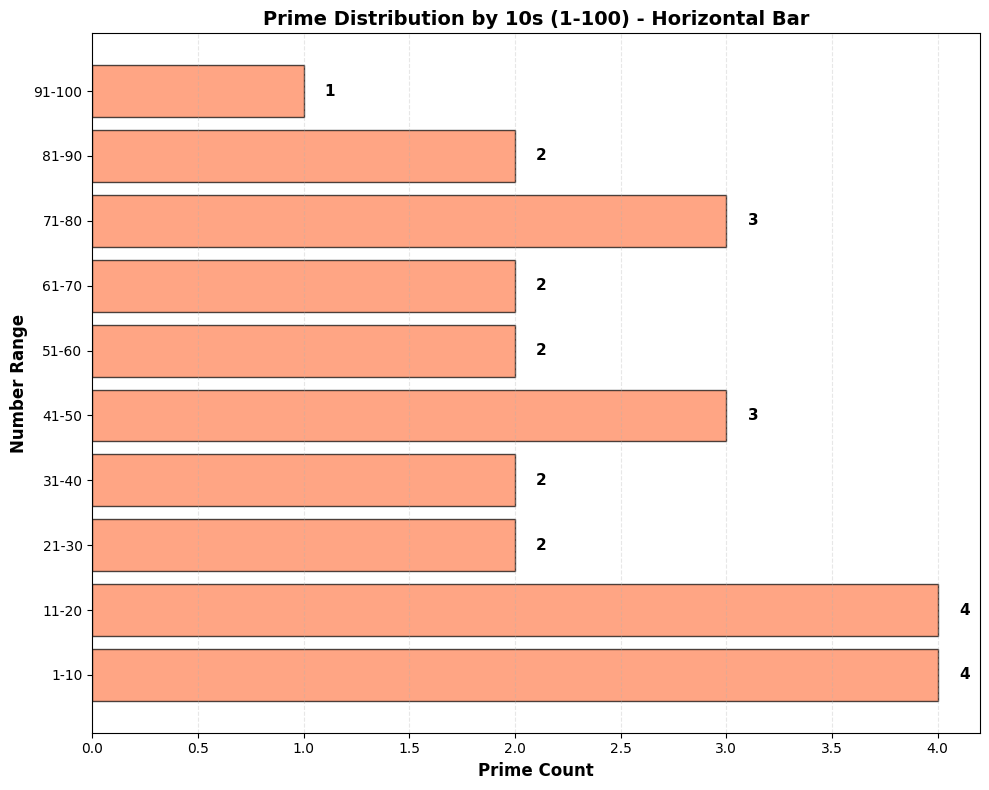

In [46]:
plt.figure(figsize=(10, 8))
bars = plt.barh(range_labels, prime_counts, color='coral', edgecolor='black', alpha=0.7)

# 막대 끝에 값 표시
for i, (bar, count) in enumerate(zip(bars, prime_counts)):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             str(count), ha='left', va='center', fontsize=11, fontweight='bold')

plt.xlabel('Prime Count', fontsize=12, fontweight='bold')
plt.ylabel('Number Range', fontsize=12, fontweight='bold')
plt.title('Prime Distribution by 10s (1-100) - Horizontal Bar', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## 5. 그래프 3: 그라데이션 색상 막대 그래프

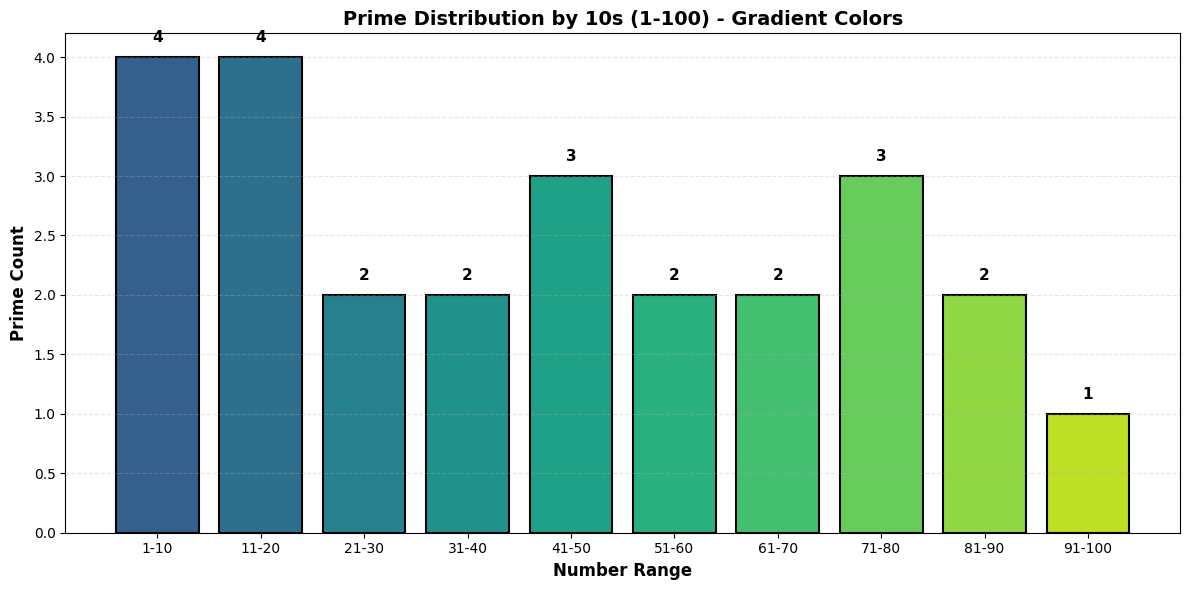

In [47]:
plt.figure(figsize=(12, 6))

# 색상 그라데이션 생성
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(prime_counts)))
bars = plt.bar(range_labels, prime_counts, color=colors, edgecolor='black', linewidth=1.5)

# 막대 위에 값 표시
for bar, count in zip(bars, prime_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Number Range', fontsize=12, fontweight='bold')
plt.ylabel('Prime Count', fontsize=12, fontweight='bold')
plt.title('Prime Distribution by 10s (1-100) - Gradient Colors', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## 6. 그래프 4: 누적 막대 그래프

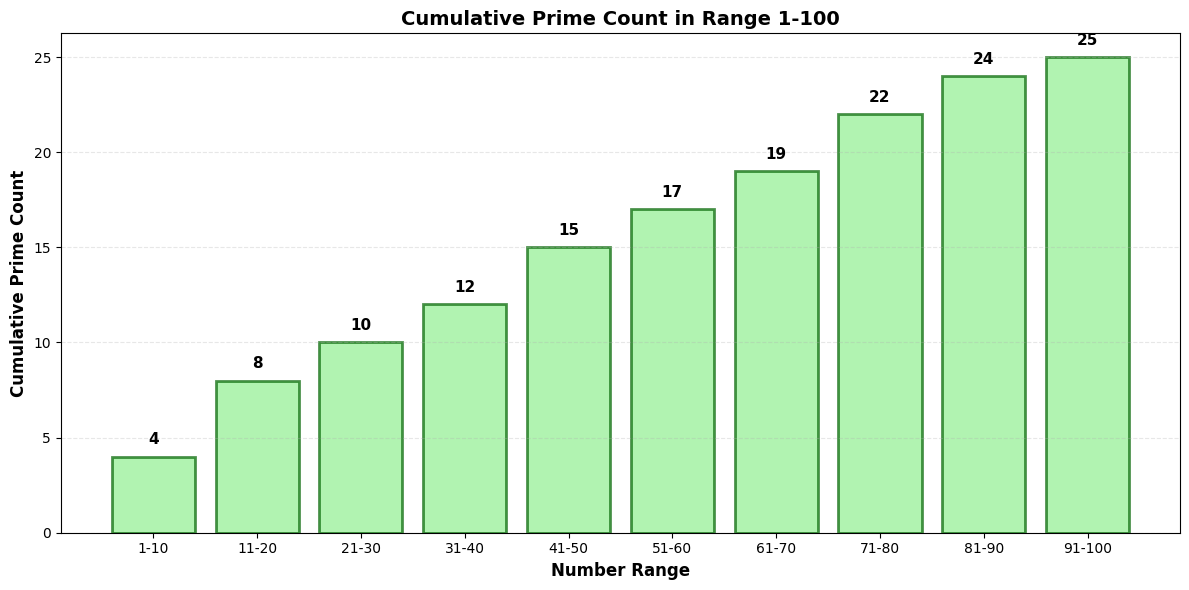

In [48]:
plt.figure(figsize=(12, 6))

# 누적 소수 개수 계산
cumulative_counts = np.cumsum(prime_counts)

bars = plt.bar(range_labels, cumulative_counts, color='lightgreen', 
               edgecolor='darkgreen', linewidth=2, alpha=0.7)

# 막대 위에 값 표시
for bar, count in zip(bars, cumulative_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Number Range', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Prime Count', fontsize=12, fontweight='bold')
plt.title('Cumulative Prime Count in Range 1-100', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## 7. 그래프 5: 개별 소수 위치 표시

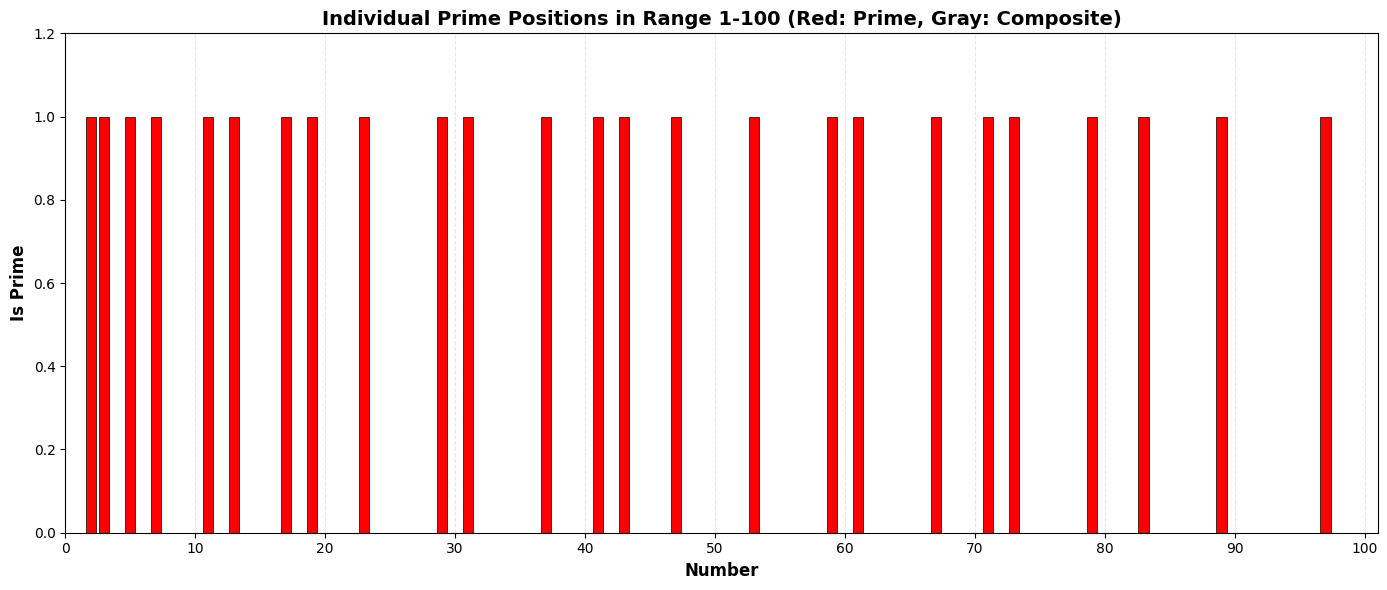

In [49]:
plt.figure(figsize=(14, 6))

# 모든 숫자에 대해 소수 여부 표시
all_numbers = list(range(1, 101))
is_prime_list = [1 if num in primes else 0 for num in all_numbers]

colors_list = ['red' if val == 1 else 'lightgray' for val in is_prime_list]
bars = plt.bar(all_numbers, is_prime_list, color=colors_list, edgecolor='black', linewidth=0.5)

plt.xlabel('Number', fontsize=12, fontweight='bold')
plt.ylabel('Is Prime', fontsize=12, fontweight='bold')
plt.title('Individual Prime Positions in Range 1-100 (Red: Prime, Gray: Composite)', fontsize=14, fontweight='bold')
plt.ylim(0, 1.2)
plt.xlim(0, 101)
plt.xticks(range(0, 101, 10))
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## 8. 그래프 6: 서브플롯으로 여러 그래프 한번에 보기

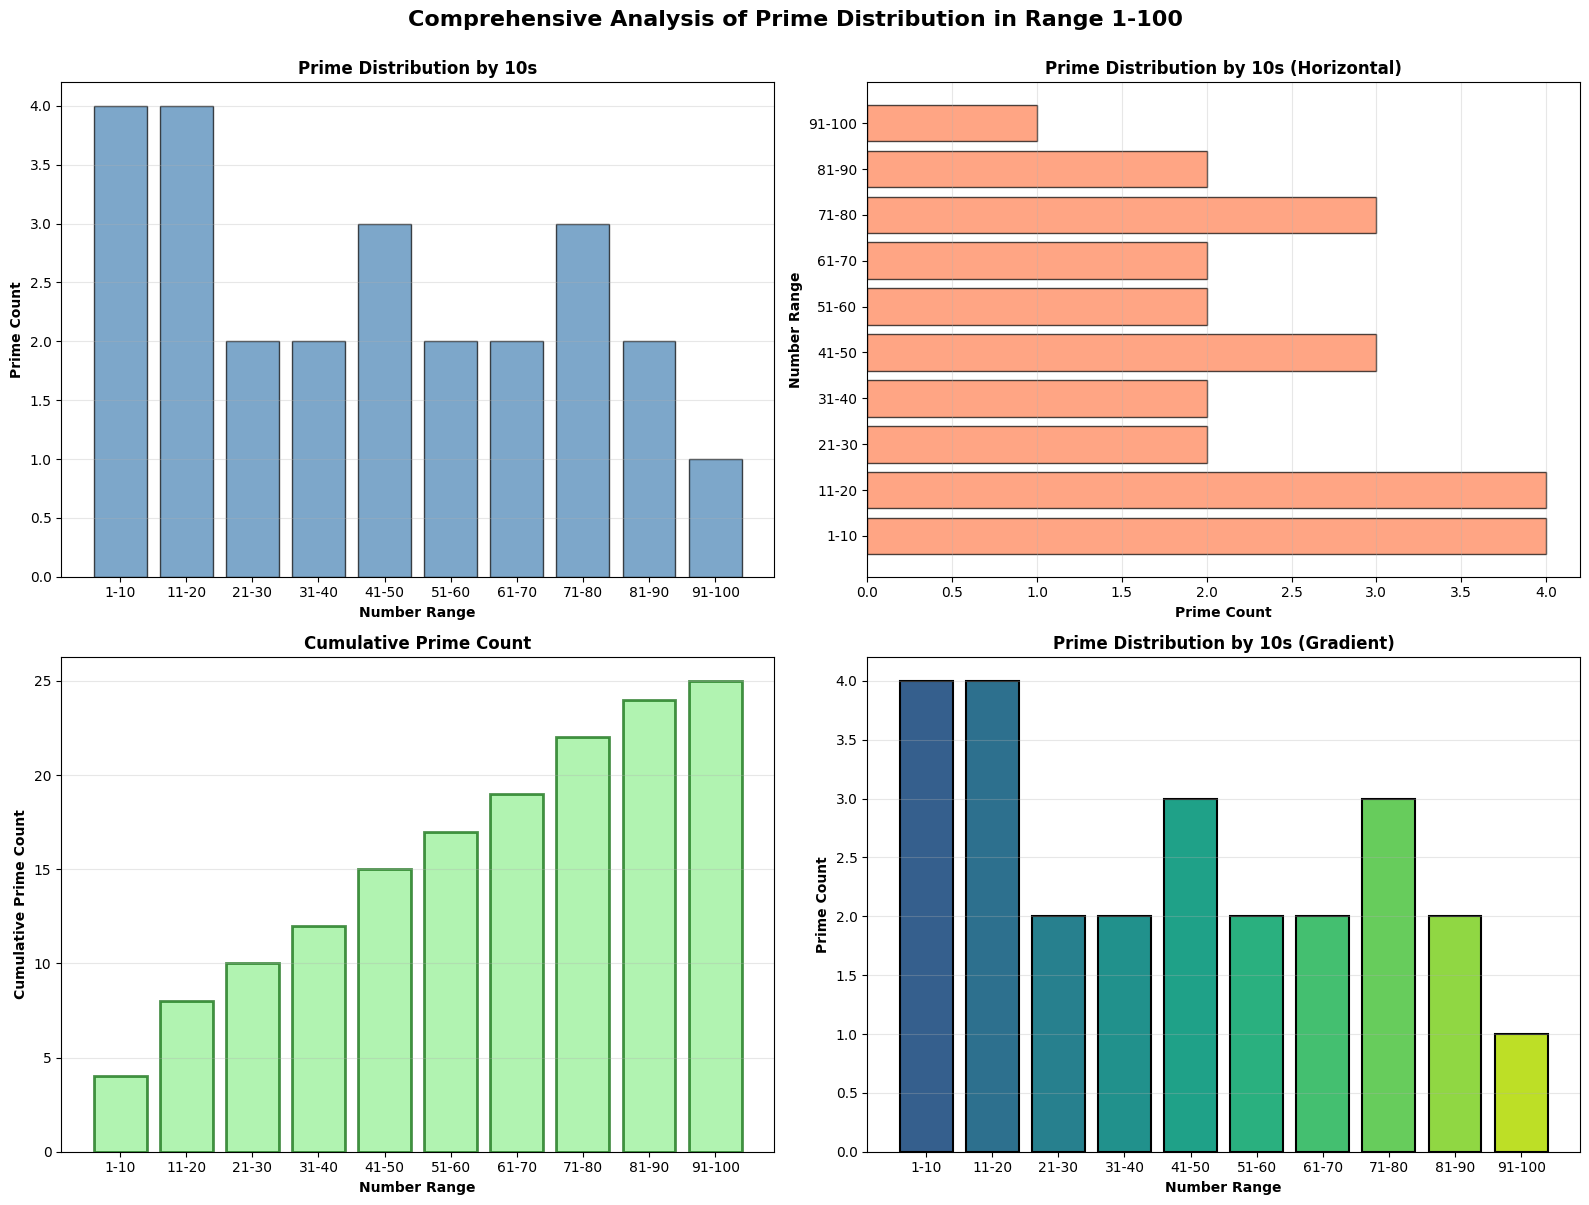

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 세로 막대 그래프
axes[0, 0].bar(range_labels, prime_counts, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Number Range', fontweight='bold')
axes[0, 0].set_ylabel('Prime Count', fontweight='bold')
axes[0, 0].set_title('Prime Distribution by 10s', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. 가로 막대 그래프
axes[0, 1].barh(range_labels, prime_counts, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Prime Count', fontweight='bold')
axes[0, 1].set_ylabel('Number Range', fontweight='bold')
axes[0, 1].set_title('Prime Distribution by 10s (Horizontal)', fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. 누적 막대 그래프
axes[1, 0].bar(range_labels, cumulative_counts, color='lightgreen', 
               edgecolor='darkgreen', linewidth=2, alpha=0.7)
axes[1, 0].set_xlabel('Number Range', fontweight='bold')
axes[1, 0].set_ylabel('Cumulative Prime Count', fontweight='bold')
axes[1, 0].set_title('Cumulative Prime Count', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. 그라데이션 막대 그래프
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(prime_counts)))
axes[1, 1].bar(range_labels, prime_counts, color=colors, edgecolor='black', linewidth=1.5)
axes[1, 1].set_xlabel('Number Range', fontweight='bold')
axes[1, 1].set_ylabel('Prime Count', fontweight='bold')
axes[1, 1].set_title('Prime Distribution by 10s (Gradient)', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle('Comprehensive Analysis of Prime Distribution in Range 1-100', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 9. 분석 요약

In [51]:
print('='*60)
print('1부터 100까지의 소수 분포 분석 요약')
print('='*60)
print(f'\n총 소수 개수: {len(primes)}개')
print(f'\n10단위별 소수 개수:')
for label, count in zip(range_labels, prime_counts):
    print(f'  {label}: {count}개 ({count/len(primes)*100:.1f}%)')
print(f'\n가장 많은 소수가 있는 구간: {range_labels[prime_counts.index(max(prime_counts))]} ({max(prime_counts)}개)')
print(f'가장 적은 소수가 있는 구간: {range_labels[prime_counts.index(min(prime_counts))]} ({min(prime_counts)}개)')
print('='*60)

1부터 100까지의 소수 분포 분석 요약

총 소수 개수: 25개

10단위별 소수 개수:
  1-10: 4개 (16.0%)
  11-20: 4개 (16.0%)
  21-30: 2개 (8.0%)
  31-40: 2개 (8.0%)
  41-50: 3개 (12.0%)
  51-60: 2개 (8.0%)
  61-70: 2개 (8.0%)
  71-80: 3개 (12.0%)
  81-90: 2개 (8.0%)
  91-100: 1개 (4.0%)

가장 많은 소수가 있는 구간: 1-10 (4개)
가장 적은 소수가 있는 구간: 91-100 (1개)
